# HW2 Problem 3 by Justin Bang


> Used: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/



## Loading and processing the CIFAR10 data set

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers, layers, models



(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


# Underfit Model






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/15





50000/50000 [==============================] - 29s 583us/step - loss: 2.3360 - acc: 0.1001 - val_loss: 2.3101 - val_acc: 0.1000
Epoch 2/15
50000/50000 [==============================] - 20s 401us/step - loss: 2.3145 - acc: 0.0976 - val_loss: 2.3057 - val_acc: 0.1316
Epoch 3/15
50000/50000 [==============================] - 20s 402us/step - loss: 2.3098 - acc: 0.0987 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 4/15
50000/50000 [==============================] - 20s 402us/step - loss: 2.3069 - acc: 0.1021 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 5/15
50000/50000 [==============================] - 20s 401us/step - loss: 2.3056 - acc: 0.0989 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 6/15
50000/50000 [=======

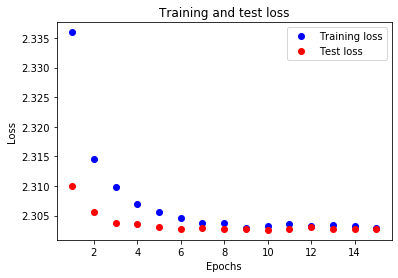

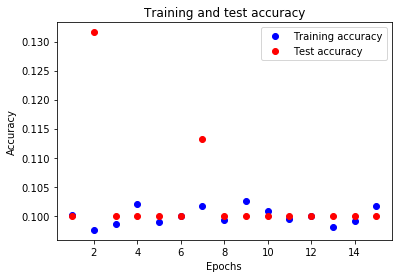

In [2]:
model_underfit = models.Sequential()
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.MaxPooling2D((2, 2)))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.MaxPooling2D((2, 2)))
model_underfit.add(layers.Flatten())
model_underfit.add(layers.Dropout(0.9))
model_underfit.add(layers.Dense(32, activation='sigmoid', kernel_initializer='he_uniform'))
model_underfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_underfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 15
history_underfit = model_underfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

# Training/test loss/accuracy during training
history_dict_underfit = history_underfit.history
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and test accuracy
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
plt.plot(epochs_range, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Model

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 237us/step - loss: 1.7583 - acc: 0.3758 - val_loss: 1.5327 - val_acc: 0.4576
Epoch 2/20
50000/50000 [==============================] - 12s 244us/step - loss: 1.4289 - acc: 0.4937 - val_loss: 1.3617 - val_acc: 0.5188
Epoch 3/20
50000/50000 [==============================] - 12s 246us/step - loss: 1.2693 - acc: 0.5514 - val_loss: 1.2439 - val_acc: 0.5560
Epoch 4/20
50000/50000 [==============================] - 13s 253us/step - loss: 1.1687 - acc: 0.5931 - val_loss: 1.1568 - val_acc: 0.5921
Epoch 5/20
50000/50000 [==============================] - 13s 256us/step - loss: 1.0911 - acc: 0.6196 - val_loss: 1.0982 - val_acc: 0.6180
Epoch 6/20
50000/50000 [==============================] - 13s 254us/step - loss: 1.0233 - acc: 0.6450 - val_loss: 1.0715 - val_acc: 0.6187
Epoch 7/20
50000/50000 [==============================] - 12s 247us/step - loss: 0.9657 - acc: 0.6648 - val_loss: 1.

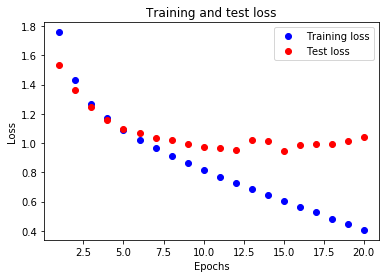

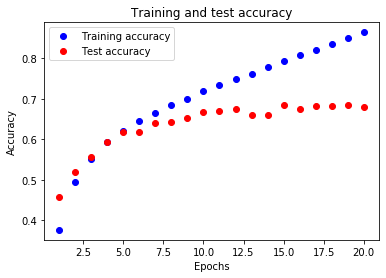

In [3]:
model_overfit = models.Sequential()
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_overfit.add(layers.MaxPooling2D((2, 2)))
model_overfit.add(layers.Flatten())
model_underfit.add(layers.Dropout(0.01))
model_overfit.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_overfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_overfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 20
history_overfit = model_overfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

# Training/test loss/accuracy during training
history_dict_overfit = history_overfit.history
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and test accuracy
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
plt.plot(epochs_range, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Goodfit model

In [0]:
model_goodfit = models.Sequential()
model_goodfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_goodfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_goodfit.add(layers.MaxPooling2D((2, 2)))
model_goodfit.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_goodfit.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_goodfit.add(layers.MaxPooling2D((2, 2)))
model_goodfit.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_goodfit.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_goodfit.add(layers.MaxPooling2D((2, 2)))
model_goodfit.add(layers.Flatten())
model_goodfit.add(layers.Dropout(0.4))
model_goodfit.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_goodfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_goodfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 30
history_goodfit = model_goodfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64,
    verbose=1,
    validation_data=(test_images, test_labels)
)

# Training/test loss/accuracy during training
history_dict_goodfit = history_goodfit.history
loss_values_goodfit = history_dict_goodfit['loss']
test_loss_values_goodfit = history_dict_goodfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_goodfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_goodfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and test accuracy
acc_values_goodfit = history_dict_goodfit['acc']
test_acc_values_goodfit = history_dict_goodfit['val_acc']
plt.plot(epochs_range, acc_values_goodfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_goodfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 20s 409us/step - loss: 1.9609 - acc: 0.2728 - val_loss: 1.6336 - val_acc: 0.4041
Epoch 2/30
50000/50000 [==============================] - 20s 395us/step - loss: 1.6226 - acc: 0.4026 - val_loss: 1.4759 - val_acc: 0.4749
Epoch 3/30
50000/50000 [==============================] - 20s 393us/step - loss: 1.4688 - acc: 0.4646 - val_loss: 1.3553 - val_acc: 0.5201
Epoch 4/30
50000/50000 [==============================] - 20s 398us/step - loss: 1.3618 - acc: 0.5067 - val_loss: 1.2662 - val_acc: 0.5428
Epoch 5/30
50000/50000 [==============================] - 20s 401us/step - loss: 1.2710 - acc: 0.5440 - val_loss: 1.1768 - val_acc: 0.5824
Epoch 6/30
50000/50000 [==============================] - 20s 396us/step - loss: 1.1979 - acc: 0.5711 - val_loss: 1.0921 - val_acc: 0.6158
Epoch 7/30
50000/50000 [==============================] - 20s 392us/step - loss: 1.1123 - acc: 0.6059 - val_loss: 1.